In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from rffi_utils import display_data,\
    show_correlation, get_boxplot

In [6]:
df = pd.read_csv(r'D:\WorkE\meteobase\sasha\P_new.csv', sep=';')

In [10]:
display_data(df)

,Тип,Общ.кол,% пропусков,Кол-во уник.значений
T,float64,17283,0.0,8762
T_mod1,float64,17283,0.0,7227
T_mod2,float64,17283,0.0,7229
T_mod3,float64,17283,0.0,7226
T_mod4,float64,17283,0.0,7229
T_mod5,float64,17283,0.0,7225


In [23]:
# Статистики по исходным данным
df.describe()

,T,T_mod1,T_mod2,T_mod3,T_mod4,T_mod5
count,17283.000000,17283.000000,17283.000000,17283.000000,17283.000000,17283.000000
mean,28.071361,30.532621,30.440208,30.305777,30.121499,30.705450
std,56.649230,62.029153,61.853532,61.445219,60.994481,62.480130
min,-0.229740,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20.023385,20.133220,20.110770,20.107765,20.076695,20.148755
max,272.085320,300.298650,300.776370,295.391980,291.296390,303.409860


In [44]:
# Убираем нулевые значения
df2 = df[df['T']>1].copy()

In [45]:
# Cтатистики по преобразованному набору данных
df2.describe()

,T,T_mod1,T_mod2,T_mod3,T_mod4,T_mod5
count,7457.000000,7457.000000,7457.000000,7457.000000,7457.000000,7457.000000
mean,65.009635,70.751292,70.537114,70.225543,69.798452,71.151854
std,70.979416,77.927672,77.714204,77.121594,76.510265,78.552892
min,1.000760,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.965650,6.954420,6.947680,6.950100,6.945490,6.957150
50%,31.510360,34.842680,34.770180,34.781540,34.734870,34.878360
75%,110.157670,120.867340,120.417710,120.110280,119.711600,121.383800
max,272.085320,300.298650,300.776370,295.391980,291.296390,303.409860


Распределения нессиметричны: медиана и среднее не совпадают

<AxesSubplot: >

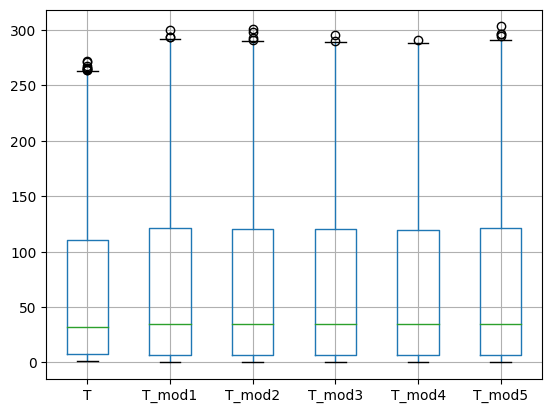

In [46]:
df2.boxplot(column=list(df2.columns))

<AxesSubplot: >

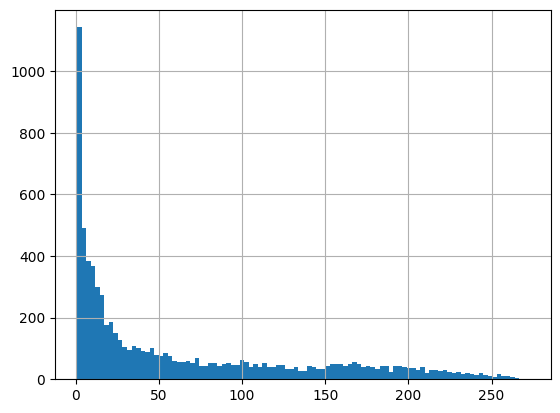

In [47]:
# Распределение по эксперименту
df2['T'].hist(bins=100)

<AxesSubplot: >

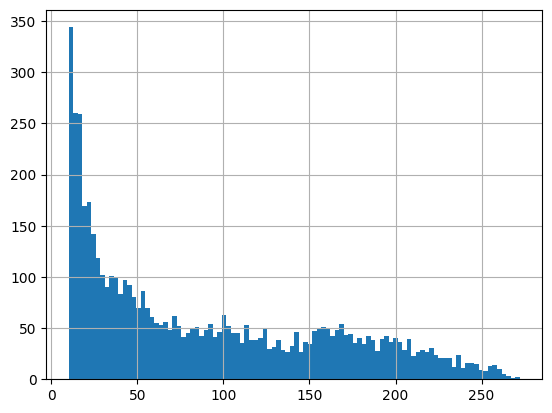

In [48]:
df2[df2['T']>10]['T'].hist(bins=100)

In [28]:
import scipy

In [49]:
df3 = df2.copy()

In [50]:
# Замена выбросов
def replace_jump_out(dframe, col):
    iqr = scipy.stats.iqr(dframe[col])
    val = np.percentile(dframe[col],75) + 1.5*iqr
    val2 = dframe[col].median()
    dframe[col] = np.where(dframe[col]>val,val2,dframe[col])
    

In [51]:
for col in list(df3.columns):
    replace_jump_out(df3, col)

<AxesSubplot: >

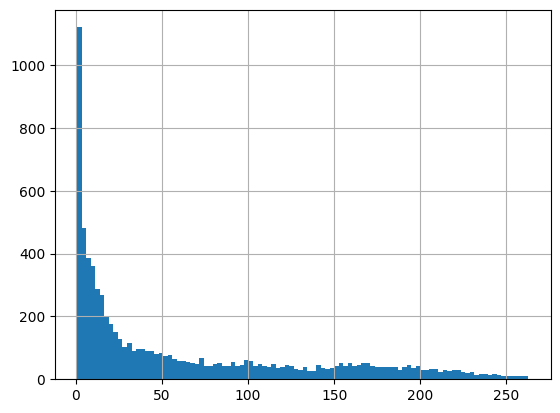

In [52]:
df3['T'].hist(bins=100)

<AxesSubplot: >

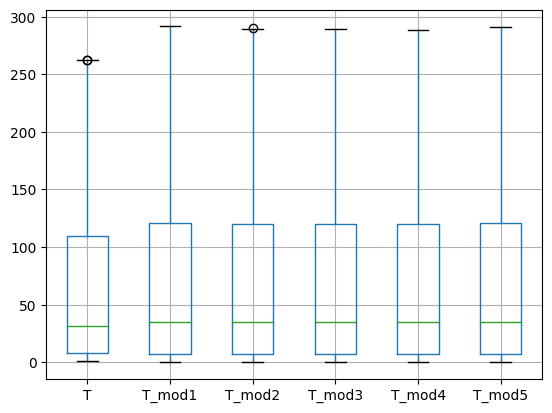

In [53]:
df3.boxplot(column=list(df3.columns))

In [54]:
df3.describe()

,T,T_mod1,T_mod2,T_mod3,T_mod4,T_mod5
count,7457.000000,7457.000000,7457.000000,7457.000000,7457.000000,7457.000000
mean,64.757273,70.646301,70.397229,70.156303,69.764046,71.010751
std,70.679149,77.800030,77.543490,77.037427,76.468322,78.381418
min,1.000760,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.965650,6.954420,6.947680,6.950100,6.945490,6.957150
50%,31.510360,34.842680,34.770180,34.781540,34.734870,34.878360
75%,109.748030,120.815500,120.199360,120.042890,119.639060,121.205330
max,262.651540,291.597960,290.271240,289.400280,288.575610,290.984830
